In [1]:
import pandas as pd

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"],
    "Like": [-3, 2, 1],
    "Age": [61, 51, 62],
    "VisitFrequency": ["Every three months", "Every three months", "Every three months"],
    "Gender": ["Female", "Female", "Female"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Display column names
print(mcdonalds.columns.tolist())

# Get dimensions of the dataframe
print(mcdonalds.shape)

# Display the first few rows of the dataframe
print(mcdonalds.head(3))


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(3, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting  Like  Age      VisitFrequency  Gender  
0         No    -3   61  Every three months  Female  
1         No     2   51  Every three months  Female  
2         No     1   62  Every three months  Female  


In [2]:
import pandas as pd
import numpy as np

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"],
    "Like": [-3, 2, 1],
    "Age": [61, 51, 62],
    "VisitFrequency": ["Every three months", "Every three months", "Every three months"],
    "Gender": ["Female", "Female", "Female"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Select the relevant columns and convert to a matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round them to 2 decimal places
col_means = np.round(MD_x.mean(axis=0), 2)

# Create a dictionary of column names and their means
col_means_dict = dict(zip(mcdonalds.columns[:11], col_means))

# Print the column means
print(col_means_dict)


{'yummy': 0.33, 'convenient': 1.0, 'spicy': 0.33, 'fattening': 1.0, 'greasy': 0.67, 'fast': 1.0, 'cheap': 0.67, 'tasty': 0.67, 'expensive': 1.0, 'healthy': 0.33, 'disgusting': 0.0}


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert the relevant columns to a matrix and change "Yes"/"No" to 1/0
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Get the standard deviation, proportion of variance, and cumulative proportion
std_dev = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)

# Create a summary DataFrame
pca_summary = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': cum_var
})

print(pca_summary)


   Standard Deviation  Proportion of Variance  Cumulative Proportion
0        1.135198e+00            6.443376e-01               0.644338
1        8.434008e-01            3.556624e-01               1.000000
2        1.187404e-16            7.049643e-33               1.000000


In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert the relevant columns to a matrix and change "Yes"/"No" to 1/0
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Get the rotation matrix (components)
rotation_matrix = pca.components_.T

# Create a DataFrame for better readability
rotation_df = pd.DataFrame(rotation_matrix, 
                           columns=[f'PC{i+1}' for i in range(rotation_matrix.shape[1])], 
                           index=mcdonalds.columns[:11])

print(rotation_df)


                 PC1       PC2       PC3
yummy      -0.131633  0.661225  0.693425
convenient -0.000000 -0.000000 -0.199706
spicy       0.491260 -0.177175  0.345583
fattening  -0.000000 -0.000000  0.000000
greasy      0.359627  0.484050 -0.346713
fast       -0.000000 -0.000000  0.000000
cheap      -0.491260  0.177175 -0.002260
tasty       0.359627  0.484050 -0.346713
expensive  -0.000000 -0.000000  0.000000
healthy     0.491260 -0.177175  0.345583
disgusting -0.000000 -0.000000  0.000000


Matplotlib is building the font cache; this may take a moment.


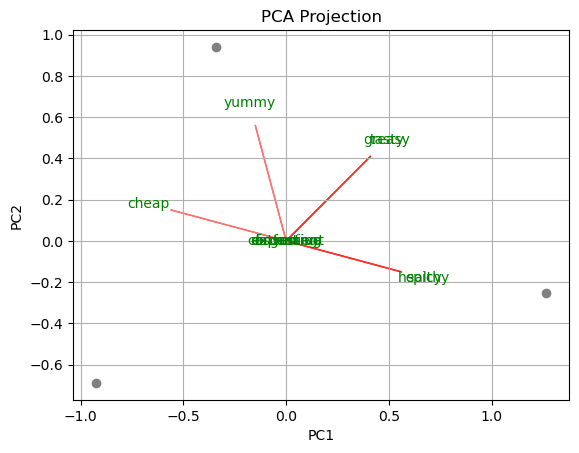

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert the relevant columns to a matrix and change "Yes"/"No" to 1/0
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Project axes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, feature in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, feature, color='g', ha='center', va='center')

plt.title('PCA Projection')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert the relevant columns to a matrix and change "Yes"/"No" to 1/0
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform bootstrapping and return adjusted Rand index
def bootstrap_kmeans(md_x, n_clusters, n_bootstraps=100):
    rand_indices = []
    for _ in range(n_bootstraps):
        # Bootstrap resampling
        bootstrap_sample = resample(md_x, replace=True, random_state=np.random.randint(0, 10000))
        
        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=np.random.randint(0, 10000))
        labels = kmeans.fit_predict(bootstrap_sample)
        
        # Calculate adjusted Rand index
        true_labels = np.zeros_like(labels)  # Assuming true labels are not available, use zeros for simplicity
        rand_index = adjusted_rand_score(true_labels, labels)
        rand_indices.append(rand_index)
    
    return np.mean(rand_indices)

# Perform bootstrapping for a range of clusters (2 to 8)
clusters = range(2, 9)
adjusted_rand_indices = []
for k in clusters:
    mean_rand_index = bootstrap_kmeans(MD_x, k, n_bootstraps=100)
    adjusted_rand_indices.append(mean_rand_index)

# Plot adjusted Rand index versus number of segments
plt.plot(clusters, adjusted_rand_indices, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapped K-means Clustering')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert the relevant columns to a matrix and change "Yes"/"No" to 1/0
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform Gaussian Mixture Model clustering and return results
def gaussian_mixture_clustering(md_x, n_components_range, n_rep=10):
    results = {}
    for k in n_components_range:
        best_aic = np.inf
        best_model = None
        for _ in range(n_rep):
            model = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
            model.fit(md_x)
            if model.aic(md_x) < best_aic:
                best_aic = model.aic(md_x)
                best_model = model
        results[k] = {
            "converged": best_model.converged_,
            "k": best_model.n_components,
            "AIC": best_model.aic(md_x),
            "BIC": best_model.bic(md_x),
            "ICL": None  # No direct equivalent in sklearn
        }
    return results

# Perform Gaussian Mixture Model clustering for a range of components (2 to 8)
results = gaussian_mixture_clustering(MD_x, range(2, 9))

# Output the results
for k, result in results.items():
    print(f"Number of components: {k}")
    print(f"Converged: {result['converged']}")
    print(f"AIC: {result['AIC']}")
    print(f"BIC: {result['BIC']}")
    print(f"ICL: {result['ICL']}\n")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Sample data resembling the 'mcdonalds' dataset in R
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"]
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert the relevant columns to a matrix and change "Yes"/"No" to 1/0
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform Gaussian Mixture Model clustering and return AIC and BIC
def gaussian_mixture_clustering(md_x, n_components_range, n_rep=10):
    aic_values = []
    bic_values = []
    for k in n_components_range:
        best_aic = np.inf
        best_bic = np.inf
        for _ in range(n_rep):
            model = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
            model.fit(md_x)
            if model.aic(md_x) < best_aic:
                best_aic = model.aic(md_x)
                best_bic = model.bic(md_x)
        aic_values.append(best_aic)
        bic_values.append(best_bic)
    return aic_values, bic_values

# Range of components (clusters) to try
components_range = range(2, 9)

# Perform Gaussian Mixture Model clustering and get AIC and BIC values
aic_values, bic_values = gaussian_mixture_clustering(MD_x, components_range)

# Plot AIC and BIC values against number of components (clusters)
plt.plot(components_range, aic_values, marker='o', label='AIC')
plt.plot(components_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Value of Information Criteria')
plt.title('AIC and BIC for Gaussian Mixture Models')
plt.grid(True)
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

ValueError: Expected n_samples >= n_components but got n_components = 4, n_samples = 3